In [2]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

device = 'cuda' if torch.cuda.is_available() else 'cpu'

import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Part 1
def getData(N):
#Defining constants
    mu, sigma = 0, 0.1 #mean and standard deviation
    
    np.random.seed(0)
    z = np.random.normal(mu, sigma, 1)    #Add noise
    x = np.random.random((N,))
    y = np.cos(2*np.pi*x)+z

    idx = np.arange(N)
    np.random.shuffle(idx)
    
    train_idx = idx[:int(N*.8)] #Values for training model
    val_idx = idx[int(N*.8):] #Values for validating model
    
    #Generate training and validation sets
    x_train, y_train = x[train_idx], y[train_idx]
    x_val, y_val = x[val_idx], y[val_idx] 

    plt.scatter(x, y, s=10)
    plt.show
    
     #We defined the data in numpy arrays. This step will add this information to Pytorch's Tensors to be sent to our chosen device
    x_train_tensor = torch.from_numpy(x_train).float().to(device)
    y_train_tensor = torch.from_numpy(y_train).float().to(device)
    
    
    return x_train_tensor, y_train_tensor



(tensor([7.1377e-01, 2.3263e-01, 4.0830e-01, 1.3690e-01, 8.6729e-01, 2.8857e-01,
         5.6542e-01, 5.7595e-01, 2.4443e-01, 1.9726e-01, 2.4083e-01, 1.2171e-02,
         7.6487e-02, 8.1194e-01, 1.4335e-01, 5.2889e-01, 7.8515e-01, 9.5874e-01,
         8.8228e-01, 5.8969e-01, 6.4720e-01, 2.5436e-01, 9.4021e-01, 6.2148e-01,
         7.3988e-01, 4.9396e-01, 8.5712e-01, 7.7870e-01, 8.9896e-01, 8.8630e-01,
         5.7771e-01, 8.6206e-01, 2.0975e-01, 1.4945e-01, 1.1738e-01, 3.9916e-01,
         6.0571e-01, 5.7754e-01, 3.0235e-02, 9.1497e-01, 4.8258e-01, 9.3256e-01,
         9.2211e-01, 6.2289e-01, 9.7552e-01, 5.1815e-01, 9.2929e-01, 4.5641e-01,
         6.2898e-01, 9.3712e-01, 4.4204e-01, 8.1497e-01, 9.2331e-01, 7.7123e-01,
         6.0631e-01, 4.6865e-01, 6.3919e-01, 9.0372e-01, 5.9107e-01, 6.0485e-01,
         4.8641e-01, 6.1446e-01, 2.8173e-01, 3.5189e-01, 1.5941e-01, 5.4688e-01,
         9.0886e-02, 9.6897e-01, 2.5868e-01, 6.2713e-02, 1.8328e-01, 6.9183e-02,
         5.9204e-01, 6.7569e

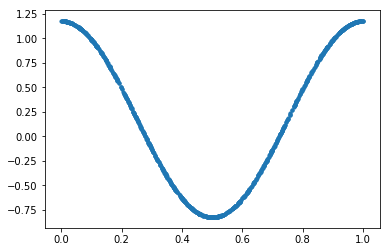

In [4]:
getData(1000)

In [5]:
def getMSE():
    
    x, y = getData(10000)
    
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]
    
    polynomial_features =  PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
    r2 = r2_score(y, y_poly_pred)
    print('Mean Square Error: ', rmse)
    print('R2: ', r2)
    
    plt.scatter(x, y, s=10)
    #sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='b')
    plt.show()

    

Mean Square Error:  0.1971274232279024
R2:  0.9231502118643118


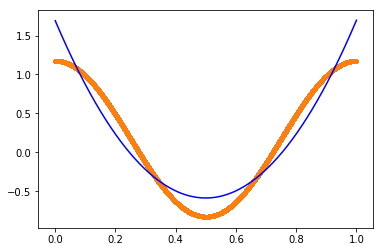

CPU times: user 1.07 s, sys: 20.4 ms, total: 1.09 s
Wall time: 624 ms


In [6]:
%%time
getMSE()